# Functional API

1.  The Keras functional API is a way to create models that are more flexible than the tf.keras.Sequential API. The functional API can handle models with non-linear topology, shared layers, and even multiple inputs or outputs.

2. The main idea is that a deep learning model is usually a directed acyclic graph (DAG) of layers. So the functional API is a way to build graphs of layers.

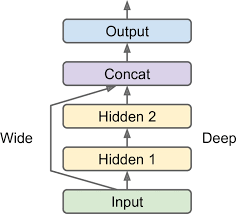

In [ ]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
from sklearn.datasets import fetch_california_housing

In [ ]:
housing = fetch_california_housing()

In [ ]:
from sklearn.model_selection import train_test_split
X_train_full, X_test, y_train_full, y_test =  train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [ ]:
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
X_train.shape

(11610, 8)

In [ ]:
input_ = keras.layers.Input(X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_) #using input_ as a function in dense layer hence functional api
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.models.Model(inputs=[input_],outputs=[output])

In [ ]:
# del model 

In [ ]:
# keras.backend.clear_session()

In [ ]:
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 8)]          0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 30)           270         input_1[0][0]                    
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 30)           930         dense[0][0]                      
__________________________________________________________________________________________________
concatenate (Concatenate)       (None, 38)           0           input_1[0][0]                    
                                                                 dense_1[0][0]         

In [ ]:
model.compile(loss="mean_squared_error",
              optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=["mae"])

In [ ]:
model_history = model.fit(X_train, y_train, epochs=40, validation_data=(X_valid, y_valid))

Epoch 1/40
363/363 [==============================] - 0s 1ms/step - loss: 0.3709 - mae: 0.4335 - val_loss: 0.3834 - val_mae: 0.4255
Epoch 2/40
363/363 [==============================] - 0s 1ms/step - loss: 0.3701 - mae: 0.4326 - val_loss: 0.4377 - val_mae: 0.4316
Epoch 3/40
363/363 [==============================] - 0s 1ms/step - loss: 0.3692 - mae: 0.4328 - val_loss: 0.4013 - val_mae: 0.4263
Epoch 4/40
363/363 [==============================] - 0s 1ms/step - loss: 0.3680 - mae: 0.4315 - val_loss: 0.3788 - val_mae: 0.4270
Epoch 5/40
363/363 [==============================] - 0s 1ms/step - loss: 0.3676 - mae: 0.4310 - val_loss: 0.3719 - val_mae: 0.4246
Epoch 6/40
363/363 [==============================] - 0s 1ms/step - loss: 0.3663 - mae: 0.4304 - val_loss: 0.3966 - val_mae: 0.4245
Epoch 7/40
363/363 [==============================] - 0s 1ms/step - loss: 0.3659 - mae: 0.4297 - val_loss: 0.3727 - val_mae: 0.4236
Epoch 8/40
363/363 [==============================] - 0s 1ms/step - loss: 0.

In [ ]:
model_history.history

{'loss': [0.37091273069381714,
  0.3700878620147705,
  0.36922743916511536,
  0.3680194616317749,
  0.3675899803638458,
  0.3662545084953308,
  0.36588138341903687,
  0.36490675806999207,
  0.36398255825042725,
  0.3633081316947937,
  0.3627561330795288,
  0.36178386211395264,
  0.3612549602985382,
  0.3604055345058441,
  0.3597036898136139,
  0.358980268239975,
  0.35829687118530273,
  0.35815101861953735,
  0.35714951157569885,
  0.356535404920578,
  0.35603034496307373,
  0.35518592596054077,
  0.354839563369751,
  0.3540306091308594,
  0.353405237197876,
  0.35305291414260864,
  0.35275983810424805,
  0.35197529196739197,
  0.3515803813934326,
  0.35077667236328125,
  0.3500552773475647,
  0.3497486114501953,
  0.34958940744400024,
  0.34873098134994507,
  0.34838220477104187,
  0.3478109836578369,
  0.3475108742713928,
  0.3469754457473755,
  0.34626439213752747,
  0.3456989824771881],
 'mae': [0.4335395097732544,
  0.43260347843170166,
  0.43281444907188416,
  0.43150195479393005

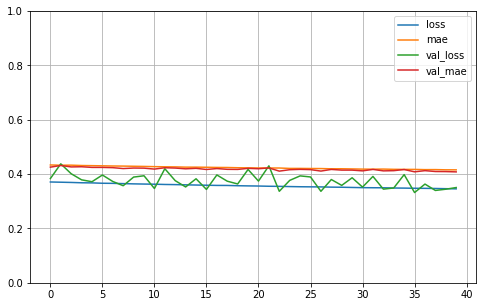

In [ ]:
pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [ ]:
mae_test = model.evaluate(X_test, y_test)  # 40 epochs

162/162 [==============================] - 0s 702us/step - loss: 0.3685 - mae: 0.4314


In [ ]:
mae_test = model.evaluate(X_test, y_test)  # 80 epochs,  loss further decreased

162/162 [==============================] - 0s 682us/step - loss: 0.3453 - mae: 0.4138


# Saving and Restoring Models

In [ ]:
model.save('my_function_api_model.h5')

In [ ]:
%pwd

'/content'

In [ ]:
%ls

my_function_api_model.h5  sample_data/


In [ ]:
del model

In [ ]:
keras.backend.clear_session()

In [ ]:
model = keras.models.load_model("my_function_api_model.h5")

In [ ]:
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 8)]          0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 30)           270         input_1[0][0]                    
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 30)           930         dense[0][0]                      
__________________________________________________________________________________________________
concatenate (Concatenate)       (None, 38)           0           input_1[0][0]                    
                                                                 dense_1[0][0]         

# Using Callbacks during Training of Networks

In [ ]:
del model
keras.backend.clear_session()

In [ ]:
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    

In [ ]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))

In [ ]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("Model-{epoch:02d}.h5")

In [ ]:
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb])

Epoch 1/10
363/363 [==============================] - 0s 1ms/step - loss: 1.8866 - val_loss: 0.7126
Epoch 2/10
363/363 [==============================] - 0s 1ms/step - loss: 0.6577 - val_loss: 0.6880
Epoch 3/10
363/363 [==============================] - 0s 1ms/step - loss: 0.5934 - val_loss: 0.5803
Epoch 4/10
363/363 [==============================] - 0s 1ms/step - loss: 0.5557 - val_loss: 0.5166
Epoch 5/10
363/363 [==============================] - 0s 1ms/step - loss: 0.5272 - val_loss: 0.4895
Epoch 6/10
363/363 [==============================] - 0s 1ms/step - loss: 0.5033 - val_loss: 0.4951
Epoch 7/10
363/363 [==============================] - 0s 1ms/step - loss: 0.4854 - val_loss: 0.4861
Epoch 8/10
363/363 [==============================] - 0s 1ms/step - loss: 0.4709 - val_loss: 0.4554
Epoch 9/10
363/363 [==============================] - 0s 1ms/step - loss: 0.4578 - val_loss: 0.4413
Epoch 10/10
363/363 [==============================] - 0s 1ms/step - loss: 0.4474 - val_loss: 0.4379

In [ ]:
%ls  #saving model after each epoch - callback

Model-01.h5  Model-04.h5  Model-07.h5  Model-10.h5
Model-02.h5  Model-05.h5  Model-08.h5  my_function_api_model.h5
Model-03.h5  Model-06.h5  Model-09.h5  sample_data/


In [ ]:
del model
keras.backend.clear_session()

In [ ]:
model = keras.models.load_model("Model-10.h5")

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30)                270       
_________________________________________________________________
dense_1 (Dense)              (None, 30)                930       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 31        
Total params: 1,231
Trainable params: 1,231
Non-trainable params: 0
_________________________________________________________________


# Using Callacks during Training only for Best Models

(models which had low loss or higher accuracy)

In [ ]:
del model
keras.backend.clear_session()

In [ ]:
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    

In [ ]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))

In [ ]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("BestModel.h5", save_best_only=True)

In [ ]:
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb])

Epoch 1/10
363/363 [==============================] - 0s 1ms/step - loss: 1.8866 - val_loss: 0.7126
Epoch 2/10
363/363 [==============================] - 0s 927us/step - loss: 0.6577 - val_loss: 0.6880
Epoch 3/10
363/363 [==============================] - 0s 956us/step - loss: 0.5934 - val_loss: 0.5803
Epoch 4/10
363/363 [==============================] - 0s 1ms/step - loss: 0.5557 - val_loss: 0.5166
Epoch 5/10
363/363 [==============================] - 0s 1ms/step - loss: 0.5272 - val_loss: 0.4895
Epoch 6/10
363/363 [==============================] - 0s 939us/step - loss: 0.5033 - val_loss: 0.4951
Epoch 7/10
363/363 [==============================] - 0s 986us/step - loss: 0.4854 - val_loss: 0.4861
Epoch 8/10
363/363 [==============================] - 0s 999us/step - loss: 0.4709 - val_loss: 0.4554
Epoch 9/10
363/363 [==============================] - 0s 986us/step - loss: 0.4578 - val_loss: 0.4413
Epoch 10/10
363/363 [==============================] - 0s 979us/step - loss: 0.4474 - va

In [ ]:
%ls

BestModel.h5  Model-03.h5  Model-06.h5  Model-09.h5               sample_data/
Model-01.h5   Model-04.h5  Model-07.h5  Model-10.h5
Model-02.h5   Model-05.h5  Model-08.h5  my_function_api_model.h5


In [ ]:
del model
keras.backend.clear_session()

In [ ]:
model = keras.models.load_model("BestModel.h5")

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30)                270       
_________________________________________________________________
dense_1 (Dense)              (None, 30)                930       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 31        
Total params: 1,231
Trainable params: 1,231
Non-trainable params: 0
_________________________________________________________________


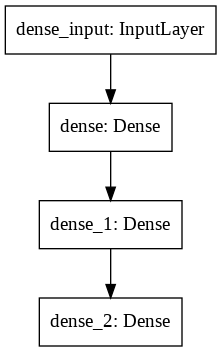

In [ ]:
import pydot
keras.utils.plot_model(model)

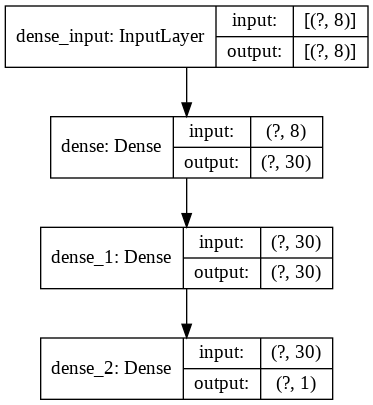

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

# Early Stopping during Training and Save Best Model 

Say a model is being trained for a very large number of epochs. We can keep an eye on validation, test scores and when scores are not improving for a number of epochs we stop the training. For instance, the network loss stayed constant after 60 epochs, so we stop there. We save the best model among the trained models.

In [ ]:
del model
keras.backend.clear_session()

In [ ]:
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    

In [ ]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))

In [ ]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("EarlyStopBestModel.h5", save_best_only=True)

In [ ]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,
                                                  restore_best_weights=True)

patience: Number of epochs with no improvement after which training will be stopped.

In [ ]:
history = model.fit(X_train, y_train, epochs=200,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/200
363/363 [==============================] - 0s 1ms/step - loss: 1.8866 - val_loss: 0.7126
Epoch 2/200
363/363 [==============================] - 0s 993us/step - loss: 0.6577 - val_loss: 0.6880
Epoch 3/200
363/363 [==============================] - 0s 957us/step - loss: 0.5934 - val_loss: 0.5803
Epoch 4/200
363/363 [==============================] - 0s 992us/step - loss: 0.5557 - val_loss: 0.5166
Epoch 5/200
363/363 [==============================] - 0s 991us/step - loss: 0.5272 - val_loss: 0.4895
Epoch 6/200
363/363 [==============================] - 0s 996us/step - loss: 0.5033 - val_loss: 0.4951
Epoch 7/200
363/363 [==============================] - 0s 956us/step - loss: 0.4854 - val_loss: 0.4861
Epoch 8/200
363/363 [==============================] - 0s 966us/step - loss: 0.4709 - val_loss: 0.4554
Epoch 9/200
363/363 [==============================] - 0s 982us/step - loss: 0.4578 - val_loss: 0.4413
Epoch 10/200
363/363 [==============================] - 0s 943us/step - los

We no longer have to plot and wait for convergence with this approach. Our model has converged at 86th epoch and it waited 10 more epochs for it to further converge but instead it went from 0.3182 to 0.3267 and it stopped right there.

In [ ]:
%ls

BestModel.h5           Model-03.h5  Model-07.h5  model_plot.png
EarlyStopBestModel.h5  Model-04.h5  Model-08.h5  model.png
Model-01.h5            Model-05.h5  Model-09.h5  my_function_api_model.h5
Model-02.h5            Model-06.h5  Model-10.h5  sample_data/


We have saved the best model as EarlyStopBestModel amongst  all epochs and we can use it to make predictions.

Early Stopping thus aalso prevents overfitting of the training data.

In [ ]:
del model
keras.backend.clear_session()

In [ ]:
model = keras.models.load_model("EarlyStopBestModel.h5")

In [ ]:
mse_test = model.evaluate(X_test, y_test)

162/162 [==============================] - 0s 730us/step - loss: 0.3343


# Hyperparameter Tuning

1. Number of Hidden Layers:
       a. For most problems single layer is efficient.
       b. But constructing deeper networks sometimes increases parameter effieciency.
       c.  Hierarchial Structure of deep layers help in converging faster.
       d. With deep networks layers don't have to learn from scratch. They use previous layer insights like Transfer learning.
       e. For instance, your model is trained to recognize faces, the same network can be used to recognize hairstyles with addition of more hidden layers.
       f. For complex networks, you can ramp up the number of layers until you are overfitting the training data.

2. Number of neurons per hidden layer:
       a. Number of neurons in input , output and hidden layers are as per the data and the problem you are trying to solve.
       b. Earlier Pyramid structures were followed where number of neurons in first layer is large and then gradually decreases.
       c. Now same number of neurons in all layers are preferred.

3. Learning rate:
       a. To  tune learning rate start with a large value that makes the algorithm diverge.
       b. Then divide the value by 3 and try again until your algorithm doesn't diverge anymore.
       c. Hence you won't be too far from an optimal learning rate.
       

4. Batch size :
       a. Thumb rule is keep your batch size less than 32.
       b. Small batch size ensures each training iteration is very fast.
       c.  Good range is between 20-32.

    

5. Epochs:
       a. Number of training iterations are set by us.
       b. A best practice could be to use Early Stop Best Model callbacks. 
       c. Set a large number of epoch and use earlystopping.  
       c. To obtain the best model during training and stop the model at the most optimal epoch.